<a href="https://colab.research.google.com/github/MainakRepositor/Data-Analysis/blob/master/Iris_Classifier_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS CLASSIFIER MODEL COMPARISON

<hr>

## 1. Importing necessary libraries

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
print("Necessary packages included successfully!")

Necessary packages included successfully!


## 2.Importing the dataset

In [38]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Iris.csv'
df = pd.read_csv(url,error_bad_lines=False)
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


## 3. Data Exploration

In [39]:
r,c = df.shape
print("Number of rows    = ",r)
print("Number of columns = ",c)

Number of rows    =  150
Number of columns =  6


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [41]:
df.drop(columns='Id',inplace=True)

## 4. Checking Missing Values

In [42]:
print("Are there any missing values in the dataset ?",df.isnull().values.any())

Are there any missing values in the dataset ? False


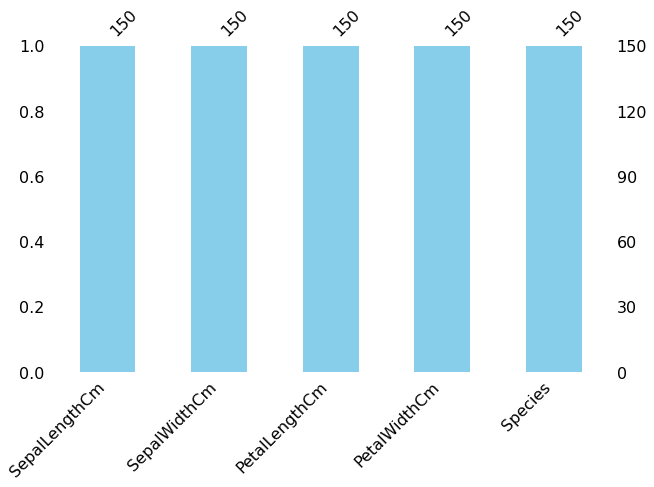

In [43]:
msno.bar(df,figsize=(10,6),color='skyblue')
plt.show()

## 5. Statistical Analysis

In [44]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
SepalLengthCm,150,NaN,NaN,NaN,5.84333,0.828066,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,150,NaN,NaN,NaN,3.054,0.433594,2,2.8,3,3.3,4.4
PetalLengthCm,150,NaN,NaN,NaN,3.75867,1.76442,1,1.6,4.35,5.1,6.9
PetalWidthCm,150,NaN,NaN,NaN,1.19867,0.763161,0.1,0.3,1.3,1.8,2.5
Species,150,3,Iris-virginica,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 6. Parametric Visualization

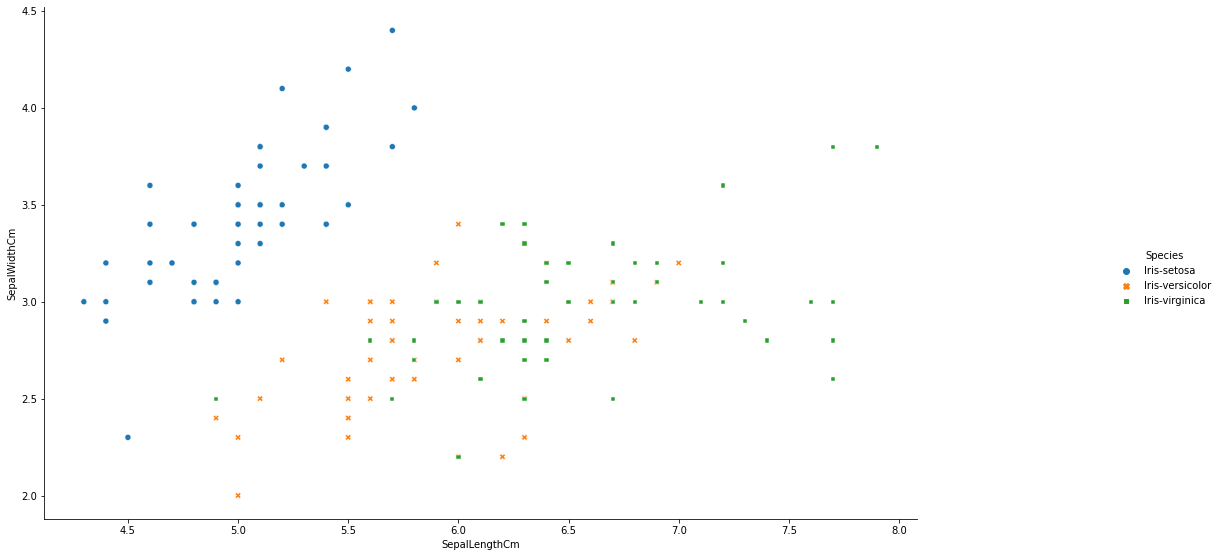

In [10]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',style='Species')
g.fig.set_size_inches(18,8)
plt.show()

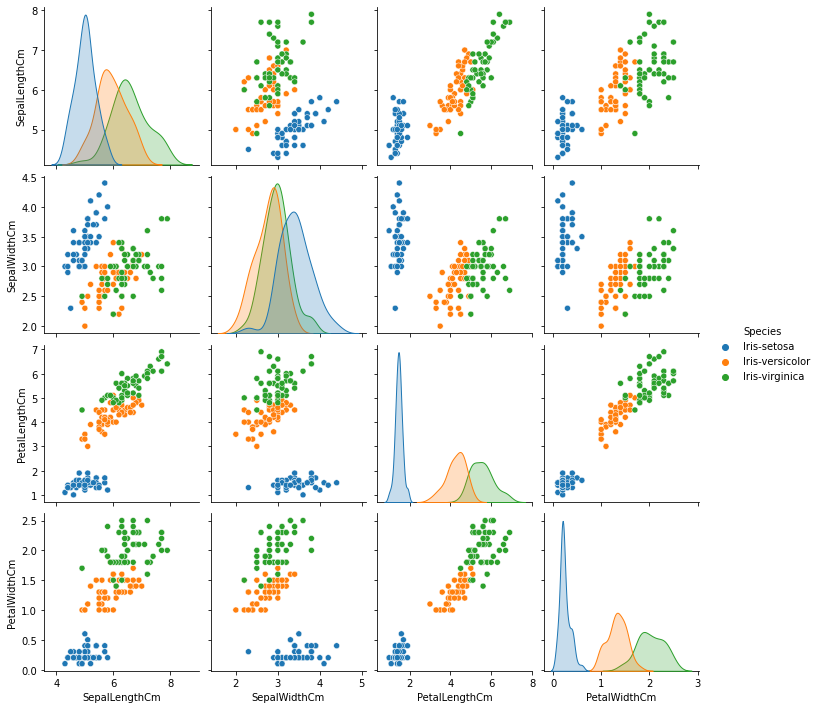

In [11]:
sns.pairplot(df,hue='Species')
plt.show()

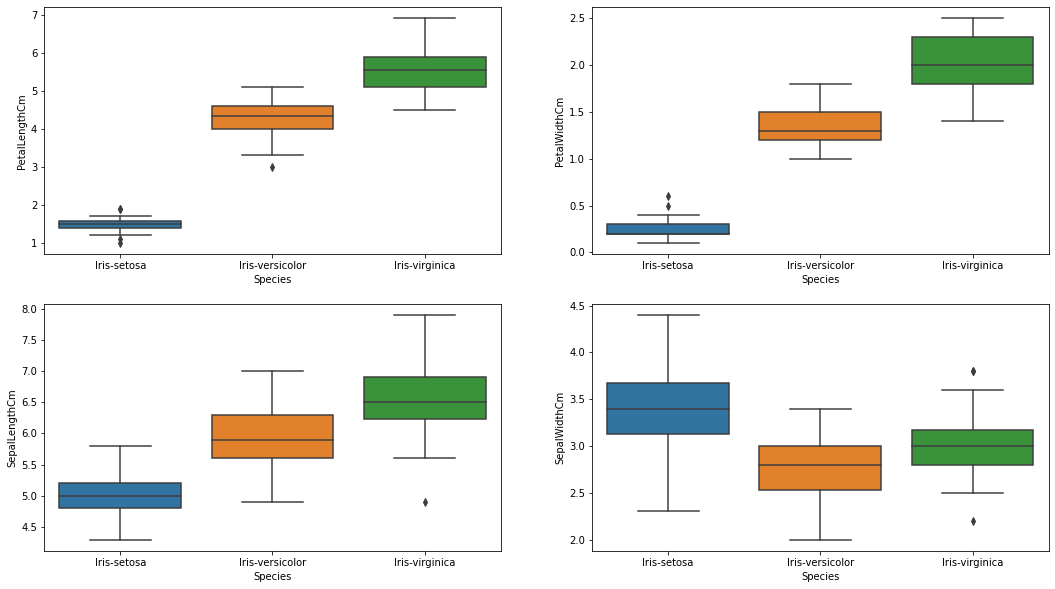

In [12]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

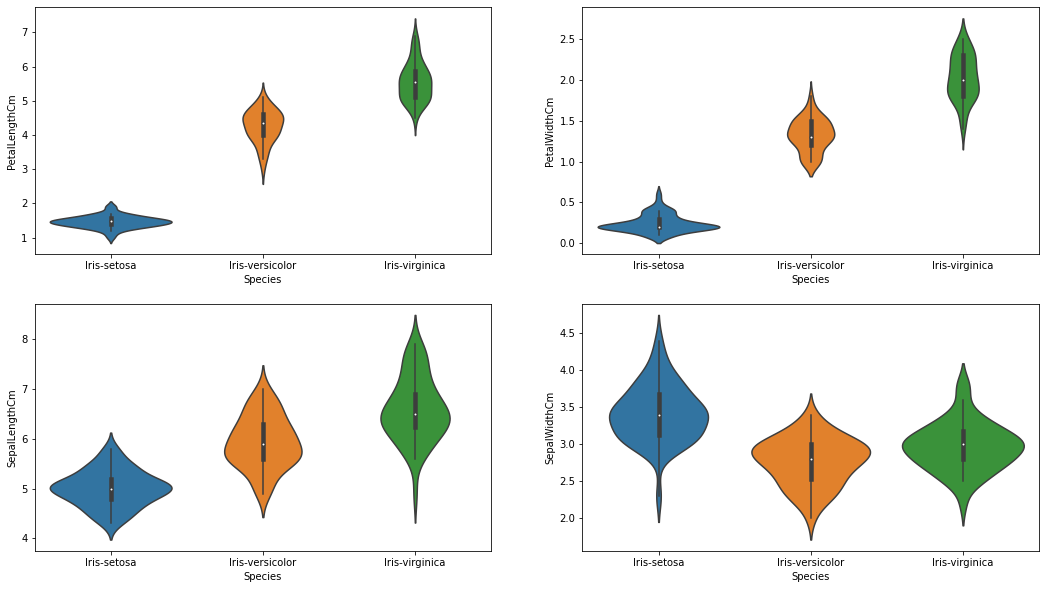

In [13]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)
plt.show()

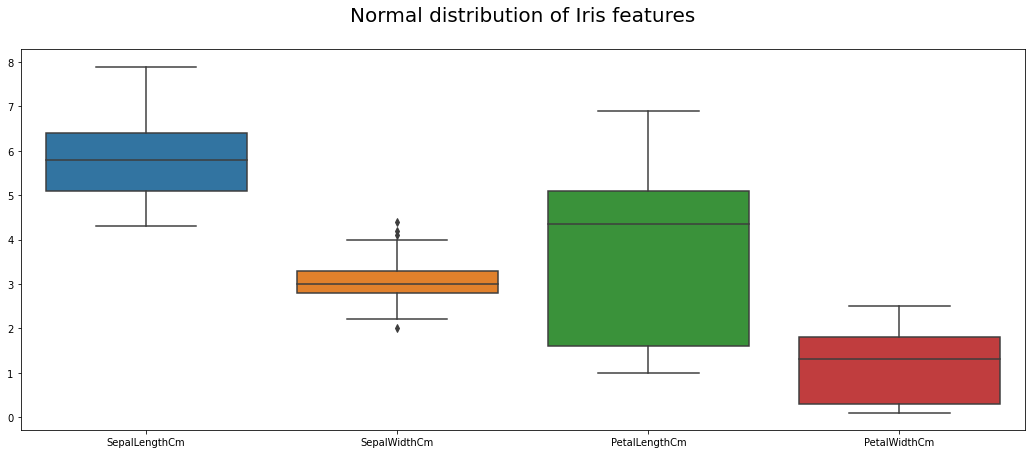

In [14]:
plt.figure(figsize=(18,7))
sns.boxplot(data=df).set_title("Normal distribution of Iris features\n",size=20)
plt.show()

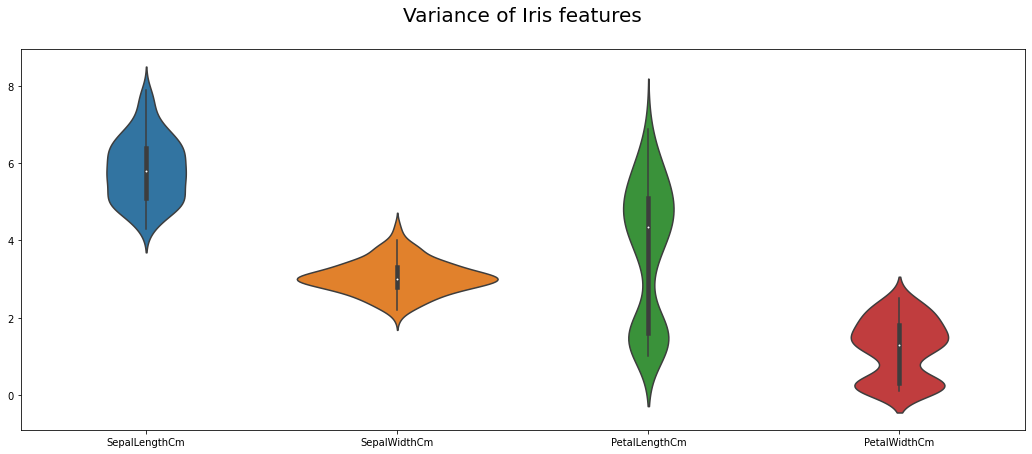

In [15]:
plt.figure(figsize=(18,7))
sns.violinplot(data=df).set_title("Variance of Iris features\n",size=20)
plt.show()

## 7. Attribute Correlation

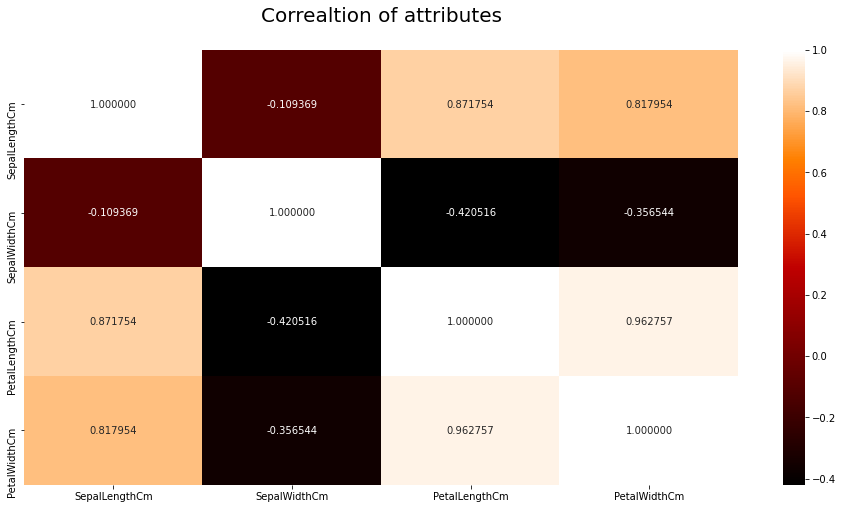

In [45]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True,fmt='f',cmap='gist_heat').set_title('Correaltion of attributes\n',size=20)
plt.show()

In [46]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## 8. Metrics

In [47]:
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("All metrics included!")

All metrics included!


## 9.Model Selection

In [48]:
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("All ML packages included!")

All ML packages included!


## 10.Random Forest

In [59]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
acc_rf = round(accuracy_score(y_test,y_pred)*100,2)
rf_acc = round(rf.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Random Forest\n",cm)
print("Accuracy of Random Forest = ",acc)
print("Precision of Random Forest = ",prec)
print("Recall of Random Forest = ",recall)
print("f1 score of Random Forest = ",f1)

Confusion matrix of Random Forest
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy of Random Forest =  1.0
Precision of Random Forest =  1.0
Recall of Random Forest =  1.0
f1 score of Random Forest =  1.0


## 11.Logistic Regression

In [60]:
lg = LogisticRegression(solver='lbfgs',max_iter=400)
lg.fit(X_train,y_train)
y_pred = lg.predict(X_test)
acc_lg = round(accuracy_score(y_test,y_pred)*100,2)
lg_acc = round(lg.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of Logistic Regression\n",cm)
print("\nAccuracy of Logistic Regression = ",acc)
print("\nPrecision of Logistic Regression = ",prec)
print("\nRecall of Logistic Regression = ",recall)
print("\nf1 score of Logistic Regression = ",f1)

Confusion matrix of Logistic Regression
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of Logistic Regression =  1.0

Precision of Logistic Regression =  1.0

Recall of Logistic Regression =  1.0

f1 score of Logistic Regression =  1.0


## 12.K Nearest Neighbours

In [61]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test,y_pred)*100,2)
knn_acc = round(knn.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  0.9666666666666667

Recall of K Nearest Neighbour =  0.9666666666666667

f1 score of K Nearest Neighbour =  0.9666666666666667


## 13.KNN Clustering graph

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


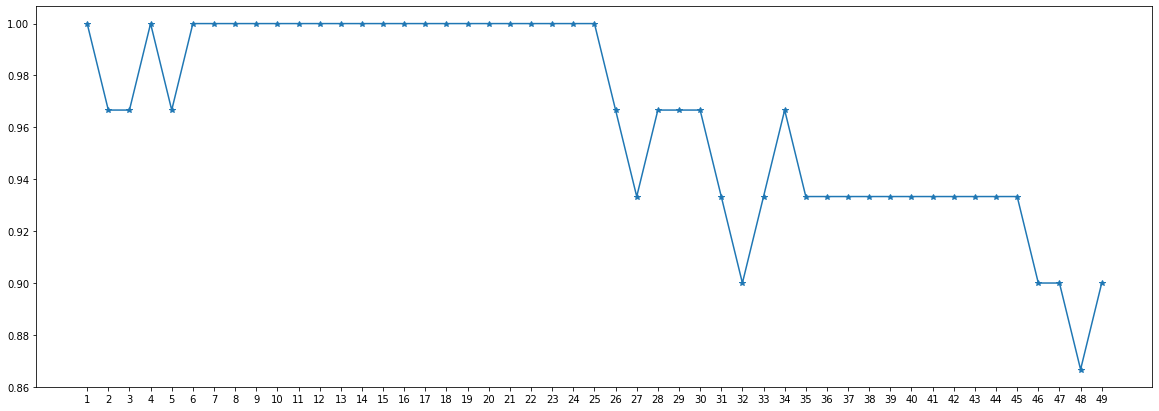

In [52]:
plt.figure(figsize=(20,7))
a_index = list(range(1,50))
a = pd.Series()
x = range(1,50)
for i in list(range(1,50)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train,y_train)
  prediction = model.predict(X_test)
  a = a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index,a,marker="*")
plt.xticks(x)
plt.show()


## 14.Gaussian Naive Bayes

In [62]:
gauss = GaussianNB()
gauss.fit(X_train,y_train)
y_pred = gauss.predict(X_test)
acc_gauss = round(accuracy_score(y_test,y_pred)*100,2)
gauss_acc = round(gauss.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Accuracy of K Nearest Neighbour =  0.9666666666666667

Precision of K Nearest Neighbour =  0.9666666666666667

Recall of K Nearest Neighbour =  0.9666666666666667

f1 score of K Nearest Neighbour =  0.9666666666666667


## 14.Linear Support Vector Classifier

In [63]:
lsvc = LinearSVC(max_iter=4000)
lsvc.fit(X_train,y_train)
y_pred = lsvc.predict(X_test)
acc_lsvc = round(accuracy_score(y_test,y_pred)*100,2)
lsvc_acc = round(lsvc.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  1.0

Precision of K Nearest Neighbour =  1.0

Recall of K Nearest Neighbour =  1.0

f1 score of K Nearest Neighbour =  1.0


## 15.Decision Tree Classifier

In [64]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = round(accuracy_score(y_test,y_pred)*100,2)
dt_acc = round(dt.score(X_train,y_train)*100,2)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
prec = precision_score(y_test,y_pred,average='micro')
recall = recall_score(y_test,y_pred,average='micro')
f1 = f1_score(y_test,y_pred,average='micro')
print("Confusion matrix of K Nearest Neighbour\n",cm)
print("\nAccuracy of K Nearest Neighbour = ",acc)
print("\nPrecision of K Nearest Neighbour = ",prec)
print("\nRecall of K Nearest Neighbour = ",recall)
print("\nf1 score of K Nearest Neighbour = ",f1)

Confusion matrix of K Nearest Neighbour
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Accuracy of K Nearest Neighbour =  1.0

Precision of K Nearest Neighbour =  1.0

Recall of K Nearest Neighbour =  1.0

f1 score of K Nearest Neighbour =  1.0


## 16.Decision Tree Plot

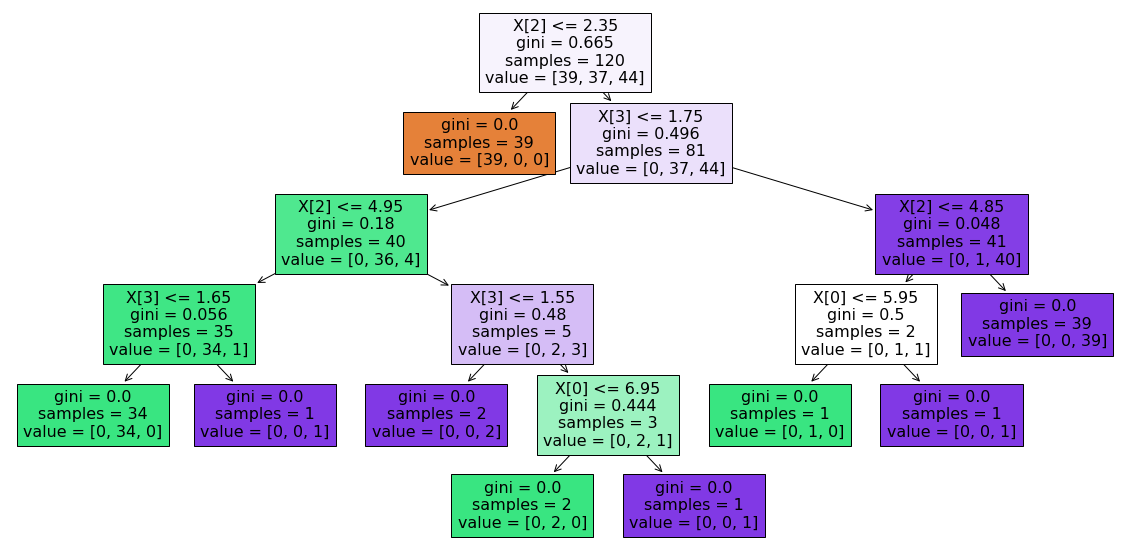

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dt.fit(X_train,y_train),filled=True)
plt.show()

## 17.Model Scorer

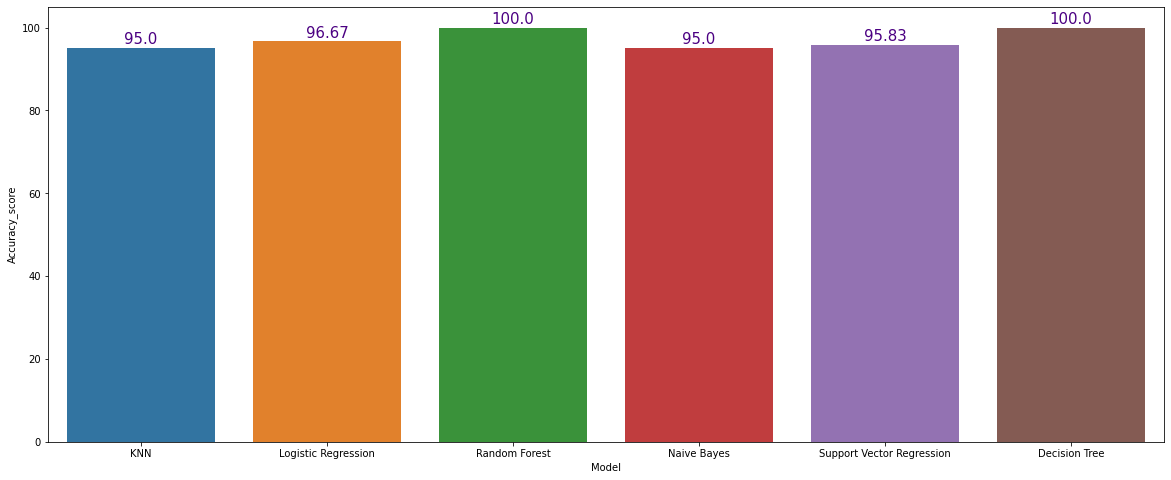

In [72]:
res = pd.DataFrame(
    {
        'Model':['KNN','Logistic Regression','Random Forest','Naive Bayes','Support Vector Regression','Decision Tree'],
     'Score':[acc_knn,acc_lg,acc_rf,acc_gauss,acc_lsvc,acc_dt],
     'Accuracy_score':[knn_acc,lg_acc,rf_acc,gauss_acc,lsvc_acc,dt_acc]
    }
)


res
plt.figure(figsize=(20,8))
ax = sns.barplot(x='Model',y='Accuracy_score',data=res)
labels = (res['Accuracy_score'])
for i,v in enumerate(labels):
  ax.text(i,v+1,str(v),horizontalalignment='center',size=15,color='indigo')

### This dataset is best predicted using a random forest or a decision tree classifier. This is so because two species have many similar features and differ by some minute difference in a combination of features,which cannot be separated by any form of regression. Hence, it can be classified better by a non-linear classifier like a decision tree or an array of decision trees (known as random forest) 